# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [2]:
import psycopg2
import pandas as pd

In [3]:
tables = {'hr_dataset':None,'production_staff':None,
         'recruiting_costs':None,
         'salary_grid':None}

In [4]:
pg_connection = {
    'host': 'dsstudents.skillbox.ru',
    'port': '5432',
    'dbname': 'human_resources',
    'user': 'readonly',
    'password': '6hajV34RTQfmxhS'
}

In [5]:
conn = psycopg2.connect(**pg_connection)
conn

<connection object at 0x000002064A2D3BF0; dsn: 'user=readonly password=xxx dbname=human_resources host=dsstudents.skillbox.ru port=5432', closed: 0>

In [6]:
def info(table, conn):
    sql_str = f"SELECT * FROM {table} LIMIT 5;"
    df = pd.read_sql_query(sql_str, conn)
    return df
for table in tables:
    tables[table] = info(table, conn)
tables['hr_dataset']

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [7]:
tables['production_staff']

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [8]:
tables['recruiting_costs']

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
tables['salary_grid']

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


## 1. Гипотезы

### Зависимость производительности ("Performance Score)"от


брачного статуса;
региона проживания;
количества отработанных лет;
руководителя;
наёмной компании.

In [10]:
tables['production_staff']['Performance Score'].unique()

array(['Fully Meets', 'Exceeds'], dtype=object)

#### От кол-ва отработанных лет

In [11]:
sql_str = 'SELECT DISTINCT perf_scoreid, "Performance Score" FROM  hr_dataset ORDER BY 1;'
perf_score  = pd.read_sql_query(sql_str, conn)
perf_score

,perf_scoreid,Performance Score
0,0,90-day meets
1,1,PIP
2,2,Needs Improvement
3,3,Fully Meets
4,4,Exceeds
5,5,Exceptional
6,9,N/A- too early to review


 Возможные варианты производительности
 * 3,4,5 - хорошая производительность

In [12]:
sql_str = 'SELECT DISTINCT maritalstatusid,maritaldesc FROM hr_dataset ORDER BY 1;'
marital = pd.read_sql_query(sql_str,conn)
marital

,maritalstatusid,maritaldesc
0,0,Single
1,1,Married
2,2,Divorced
3,3,Separated
4,4,Widowed


In [13]:
sql_str = 'SELECT DISTINCT state FROM hr_dataset ORDER BY state;'
states = pd.read_sql_query(sql_str,conn)
states.head()
# все регионы

,state
0,AL
1,AZ
2,CA
3,CO
4,CT


In [14]:
sql_str = 'SELECT DISTINCT "Manager Name" FROM hr_dataset ORDER BY 1';
managers = pd.read_sql_query(sql_str,conn)
managers
#Руководители

,Manager Name
0,Alex Sweetwater
1,Amy Dunn
2,Board of Directors
3,Brandon R. LeBlanc
4,Brannon Miller
5,Brian Champaigne
6,David Stanley
7,Debra Houlihan
8,Elijiah Gray
9,Eric Dougall


In [15]:
sql_str = 'SELECT "Employment Source" FROM recruiting_costs ORDER BY 1;'
emp_source = pd.read_sql_query(sql_str,conn)
emp_source
# все наемные компании

,Employment Source
0,Billboard
1,Careerbuilder
2,Company Intranet - Partner
3,Diversity Job Fair
4,Employee Referral
5,Glassdoor
6,Information Session
7,Internet Search
8,MBTA ads
9,Monster.com


Построим корреляция по формуле Спирмена для всех признаков. Кол-во отработанных дней переведем в качественный признак с разбиением на интервалы (1год = 1 интервал)

In [16]:
sql_str = '''SELECT perf_scoreid,maritalstatusid,"Days Employed" as days_employed,"Days Employed"/365  as years_employed, state, "Manager Name" as manager_name, 
"Employee Source" as employee_source 
FROM hr_dataset 
WHERE (perf_scoreid < 9)
ORDER BY 1;'''
main_df = pd.read_sql_query(sql_str,conn)
main_df.head()

,perf_scoreid,maritalstatusid,days_employed,years_employed,state,manager_name,employee_source
0,0,0,2211,6,MA,Kissy Sullivan,Newspager/Magazine
1,0,0,309,0,MA,Simon Roup,Vendor Referral
2,0,1,1056,2,MA,Simon Roup,Glassdoor
3,0,1,1908,5,MA,Elijiah Gray,Monster.com
4,0,0,2148,5,MA,Alex Sweetwater,Monster.com


In [17]:
from scipy.stats import spearmanr as qual_corr
# импортируем библиотеку для расчета корреляции Спирмена

In [18]:
for col in main_df.columns[1:]:
    print(f'Correlation with {col}:\t {qual_corr(main_df.perf_scoreid,main_df[col]).correlation}')
# мы видим список признаков которые влияют. Кол-во отработанных лет, HR-компании
#и руководители показали хорошие хар-ки. Остальные нам не интересны   
    

Correlation with maritalstatusid:	 0.00903570795588563
Correlation with days_employed:	 0.18835498785836924
Correlation with years_employed:	 0.1952250940605742
Correlation with state:	 0.009294728310753227
Correlation with manager_name:	 -0.12103581493531973
Correlation with employee_source:	 -0.09220636878364805


### Зависимость от количества отработанных дней

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

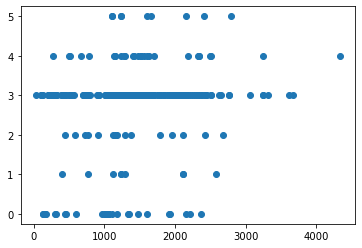

In [20]:
plt.scatter(main_df.days_employed,main_df.perf_scoreid)

По графику не особо понятно и сложно сделать вывод. Посмотрим отношение в %

In [21]:
sql_str = '''SELECT perf_scoreid, COUNT(*) FROM hr_dataset WHERE perf_scoreid < 9
GROUP BY 1 ORDER BY 1;'''
pers_relations = pd.read_sql_query(sql_str,conn)
pers_relations

,perf_scoreid,count
0,0,31
1,1,9
2,2,15
3,3,181
4,4,28
5,5,9


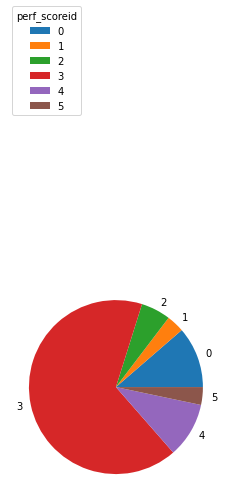

In [22]:
# построим pie график
fig, sub = plt.subplots()

widges, text = sub.pie(pers_relations['count'],explode=None,labels = pers_relations.perf_scoreid)

sub.legend(widges,pers_relations.perf_scoreid,
              title = "perf_scoreid",
               loc = "center left",
               bbox_to_anchor = {1.5, 0, 0.5, 1}
               )

Отразим данные на годовой динамике

In [23]:
sql_str = '''
SELECT perf_scoreid,"Days Employed"/365 as years_employed,
COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1,2
ORDER BY 1,2;
'''
pers_years = pd.read_sql_query(sql_str,conn)
pers_years.head()

,perf_scoreid,years_employed,count
0,0,0,6
1,0,1,3
2,0,2,11
3,0,3,4
4,0,4,2


In [24]:
sql_str = '''
SELECT "Days Employed"/365 as years_employed, COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1
ORDER BY 1;
'''
years_count = pd.read_sql_query(sql_str,conn)
years_count.head()

,years_employed,count
0,0,24
1,1,29
2,2,31
3,3,69
4,4,47


In [25]:
years_count.columns = ('years_employed','ppl')
years_count

,years_employed,ppl
0,0,24
1,1,29
2,2,31
3,3,69
4,4,47
5,5,34
6,6,24
7,7,7
8,8,4
9,9,2


In [26]:
pers_years = pd.merge(pers_years,years_count)
pers_years.head()

,perf_scoreid,years_employed,count,ppl
0,0,0,6,24
1,3,0,17,24
2,4,0,1,24
3,0,1,3,29
4,1,1,1,29


In [27]:
pers_years['percent'] = pers_years['count']*100./pers_years['ppl']
pers_years.head()

,perf_scoreid,years_employed,count,ppl,percent
0,0,0,6,24,25.000000
1,3,0,17,24,70.833333
2,4,0,1,24,4.166667
3,0,1,3,29,10.344828
4,1,1,1,29,3.448276


In [28]:
pers_years.sort_values(['years_employed', 'perf_scoreid'],inplace=True)
pers_years.head()

,perf_scoreid,years_employed,count,ppl,percent
0,0,0,6,24,25.000000
1,3,0,17,24,70.833333
2,4,0,1,24,4.166667
3,0,1,3,29,10.344828
4,1,1,1,29,3.448276


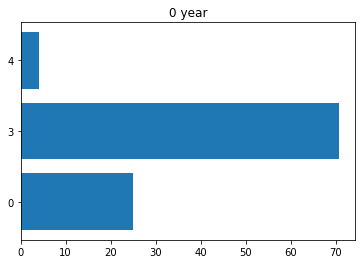

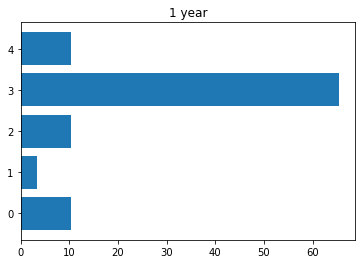

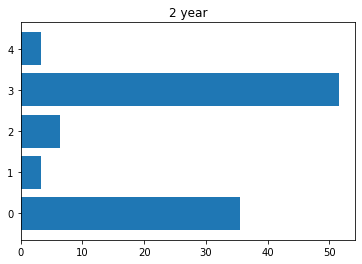

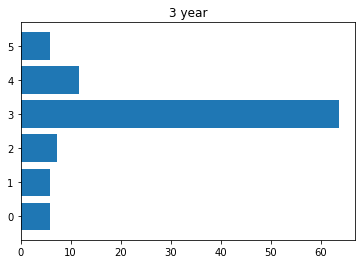

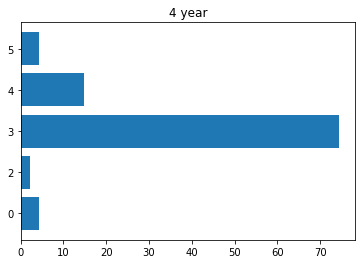

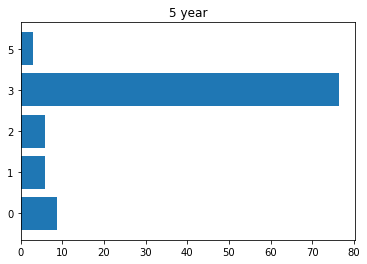

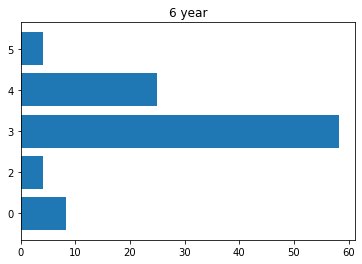

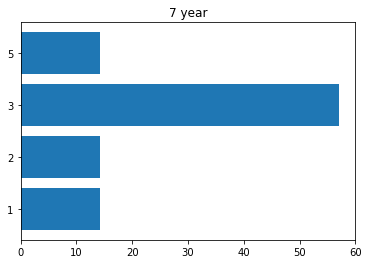

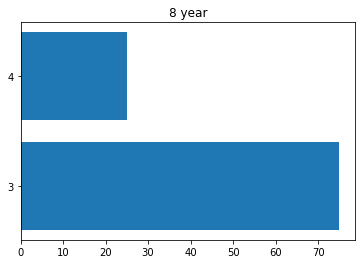

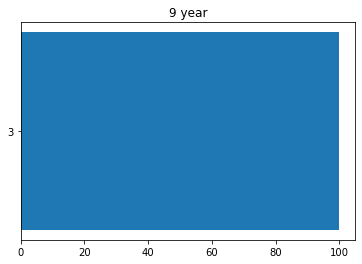

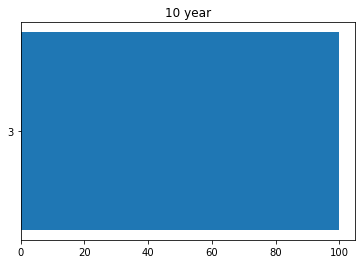

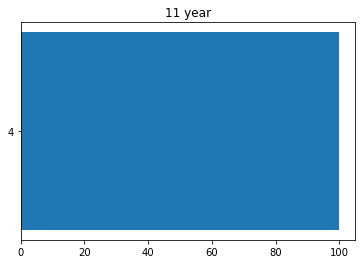

In [29]:
for i in range(12):
    fig, sub = plt.subplots()
    df = pers_years[pers_years.years_employed == i]
    sub.barh(list(map(str,df.perf_scoreid)),df.percent)
    sub.set_title(f'{i} year')
    plt.show()

Из гистограммы сверху можно сделать вовод, что на начальном этапе до первого года сотрудники работают усердно. После первого года появляются люди, которых переводят на 90дневные испытательные сроки. После 2х лет работы видим пик неуспевающих. После 3го года неупевающих и испытательного срока становится меньше. После 4го года еще меньше. После 7ми лет работает мало людей и все продуктивно. <br>
Успешные сотрудники стабильно работают и показывают высокий уровень.
После 2го года производительность падает, но восстанавлиется к 6 году.

<br>
Мы можем понять, на каких этапах нужно усилить контроль. После 2го года лучше всего обращать внимание на сотрудников.

###  Зависимость от руководителя

In [32]:
# уделим внимание каждому менеджеру
sql_str = '''
SELECT "Manager Name" as manager, perf_scoreid,COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1,2
ORDER BY 1,2;
'''
pers_manager = pd.read_sql_query(sql_str,conn)
managers.head()

,Manager Name
0,Alex Sweetwater
1,Amy Dunn
2,Board of Directors
3,Brandon R. LeBlanc
4,Brannon Miller


<ipython-input-36-f1c05cd07830>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,sub = plt.subplots()


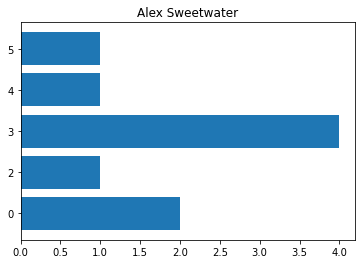

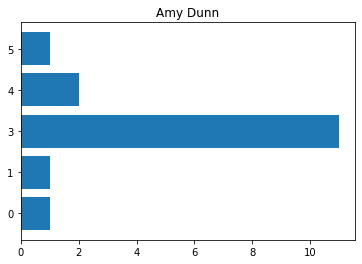

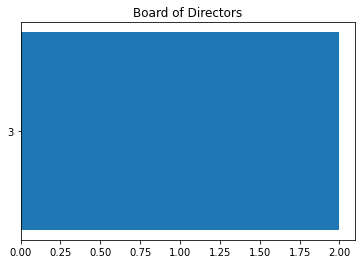

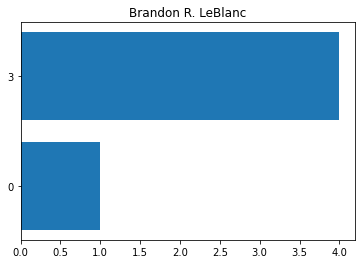

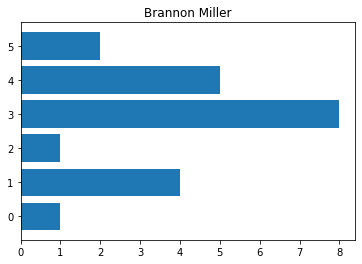

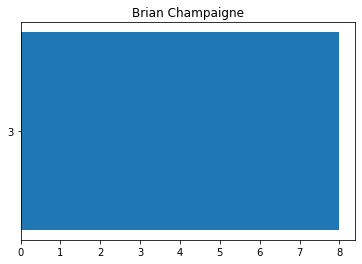

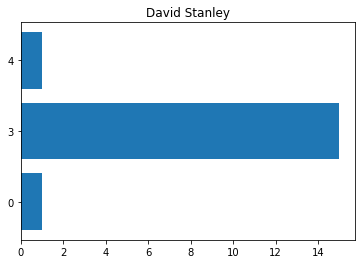

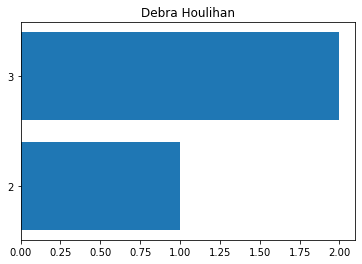

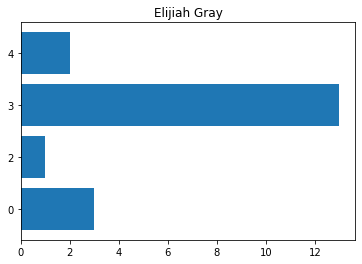

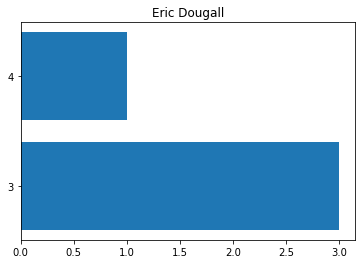

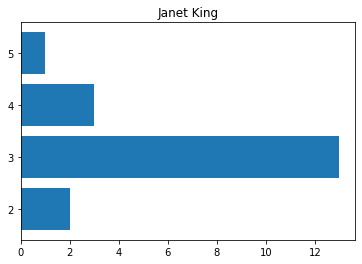

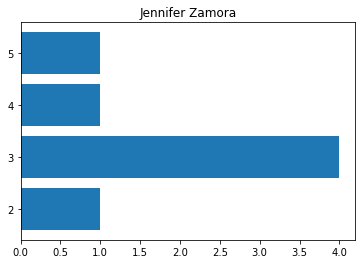

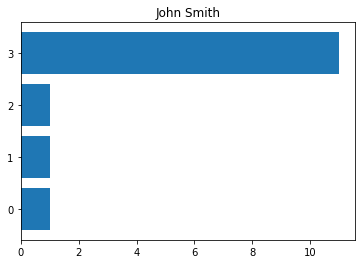

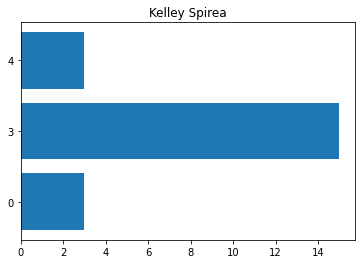

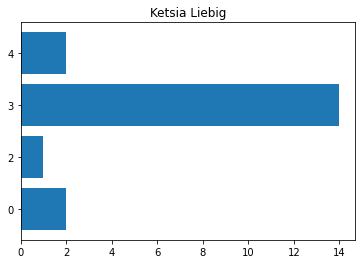

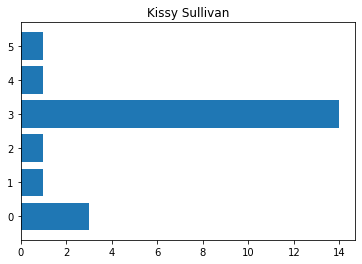

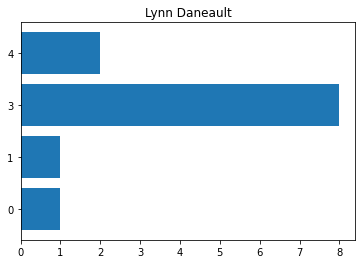

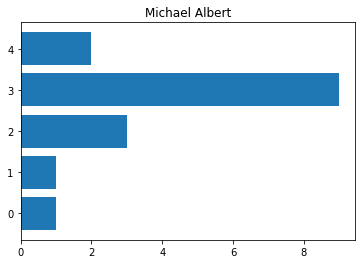

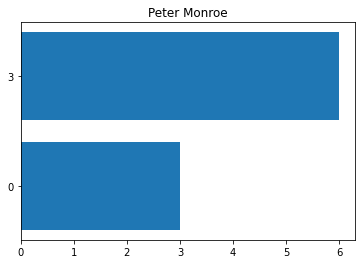

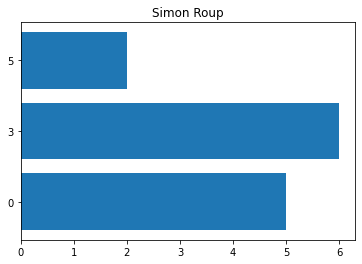

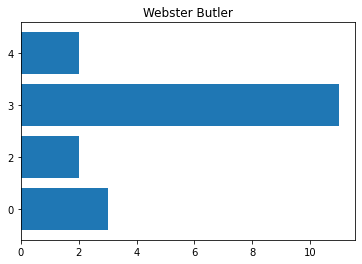

In [36]:
for i in managers['Manager Name']:
    fig,sub = plt.subplots()
    df = pers_manager[pers_manager.manager == i]
    sub.barh(list(map(str,df.perf_scoreid)),df['count'])
    sub.set_title(f'{i}')

In [41]:
sql_str = '''
SELECT DISTINCT "Manager Name" as manager, department, position
FROM hr_dataset
WHERE perf_scoreid < 9
ORDER BY 1,2,3;
'''
manager_qual = pd.read_sql_query(sql_str,conn)
manager_qual

,manager,department,position
0,Alex Sweetwater,Software Engineering,Software Engineer
1,Amy Dunn,Production,Production Technician I
2,Amy Dunn,Production,Production Technician II
3,Board of Directors,Admin Offices,Sr. Accountant
4,Board of Directors,Executive Office,President & CEO
5,Brandon R. LeBlanc,Admin Offices,Accountant I
6,Brandon R. LeBlanc,Admin Offices,Administrative Assistant
7,Brandon R. LeBlanc,Admin Offices,Sr. Accountant
8,Brannon Miller,Production,Production Technician I
9,Brannon Miller,Production,Production Technician II


In [40]:
sql_str = '''SELECT DISTINCT "Manager Name" as manager, department, position
FROM hr_dataset
WHERE perf_scoreid < 9
ORDER BY 3,2,1;'''
manager_qual2 = pd.read_sql_query(sql_str, conn)
manager_qual2

,manager,department,position
0,Brandon R. LeBlanc,Admin Offices,Accountant I
1,Brandon R. LeBlanc,Admin Offices,Administrative Assistant
2,John Smith,Sales,Area Sales Manager
3,Lynn Daneault,Sales,Area Sales Manager
4,Brian Champaigne,IT/IS,BI Developer
5,Jennifer Zamora,IT/IS,BI Director
6,Janet King,IT/IS,CIO
7,Brian Champaigne,IT/IS,Data Architect
8,Simon Roup,IT/IS,Database Administrator
9,Janet King,Production,Director of Operations


Можно сказать что
* Kissy Sullivan 
* Michael Albert
* Webster Butler
<br> более 5 неуспевающих
<br>
Большая часть сотрудников - продукты.

### Зависимость предприятия по найму

In [42]:
# запрашиваем данные о каждом предприятии и о производительности сотрудников, нанятых оттуда.

In [44]:
sql_str = '''
SELECT "Employee Source" as source, perf_scoreid as score, COUNT(*) as count
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1,2
ORDER BY 1,2;
'''
comp_score = pd.read_sql_query(sql_str,conn)
comp_score.head()

,source,score,count
0,Billboard,0,1
1,Billboard,1,1
2,Billboard,2,1
3,Billboard,3,10
4,Billboard,4,1


In [47]:
sql_str = '''
SELECT "Employee Source" as source, COUNT(*) as sum
FROM hr_dataset
WHERE perf_scoreid < 9 
GROUP BY 1
ORDER BY 1;
'''
comp_count = pd.read_sql_query(sql_str,conn)
comp_count.head()

,source,sum
0,Billboard,15
1,Careerbuilder,1
2,Company Intranet - Partner,1
3,Diversity Job Fair,26
4,Employee Referral,26


In [50]:
comp_score = pd.merge(comp_score,comp_count)
comp_score.head()

,source,score,count,sum
0,Billboard,0,1,15
1,Billboard,1,1,15
2,Billboard,2,1,15
3,Billboard,3,10,15
4,Billboard,4,1,15


In [52]:
comp_score["percent"] =  round((comp_score["count"]/comp_score["sum"]) * 100, 2)
comp_score

,source,score,count,sum,percent
0,Billboard,0,1,15,6.67
1,Billboard,1,1,15,6.67
2,Billboard,2,1,15,6.67
3,Billboard,3,10,15,66.67
4,Billboard,4,1,15,6.67
...,...,...,...,...,...
66,Website Banner Ads,3,6,11,54.55
67,Website Banner Ads,4,1,11,9.09
68,Word of Mouth,0,2,11,18.18
69,Word of Mouth,2,1,11,9.09


<ipython-input-58-769cf19e6683>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, sub = plt.subplots()


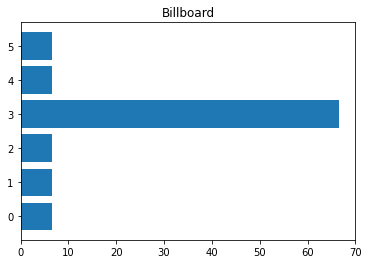

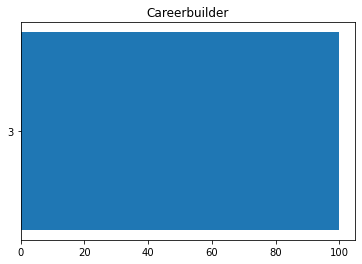

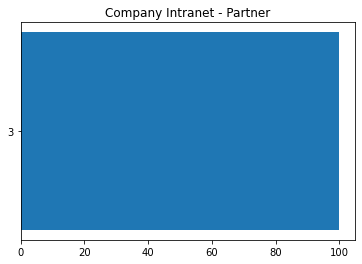

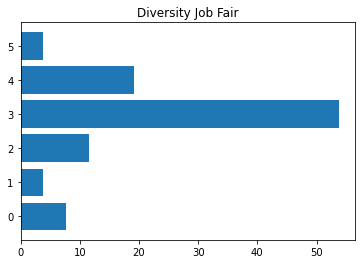

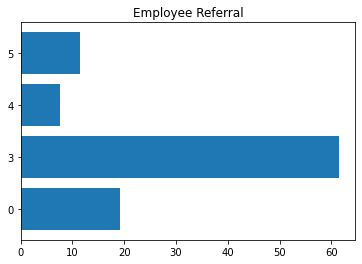

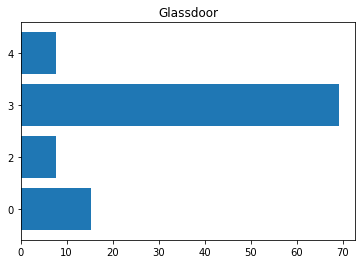

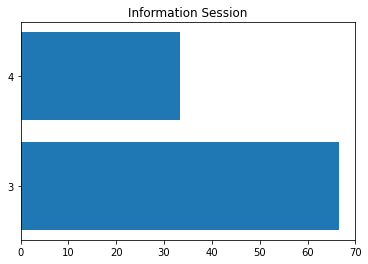

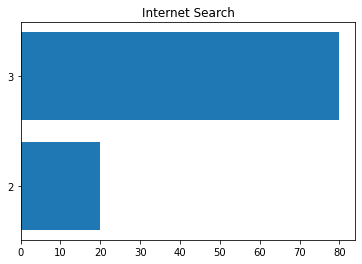

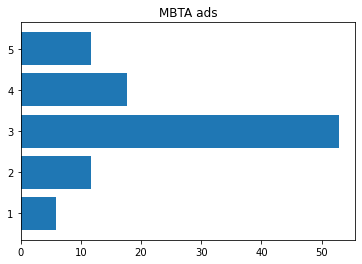

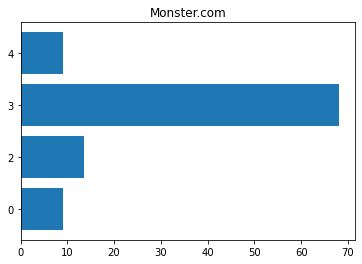

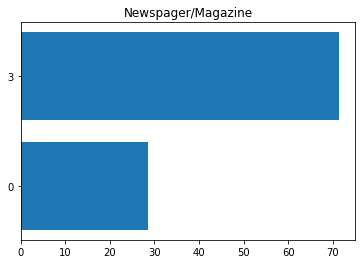

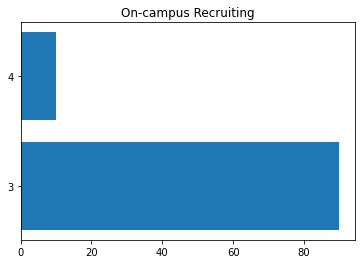

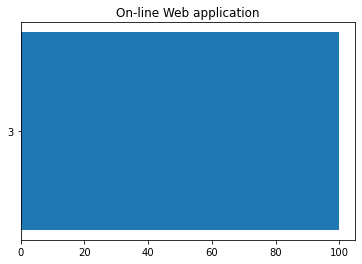

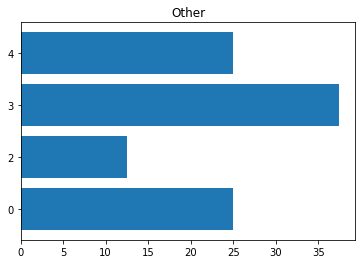

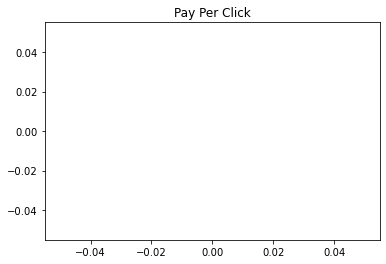

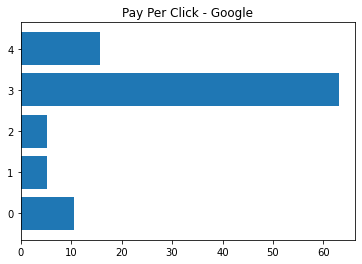

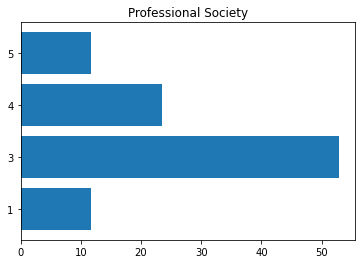

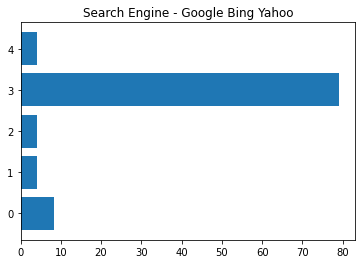

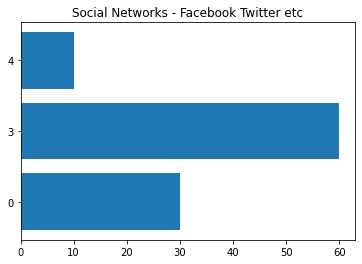

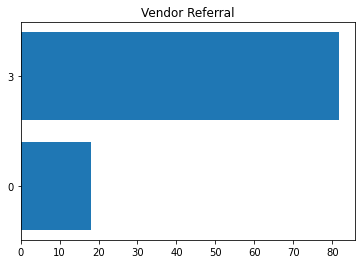

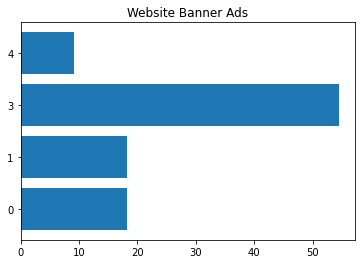

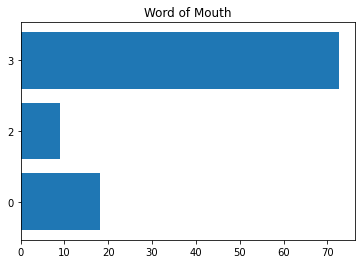

In [58]:
for i in sorted(emp_source['Employment Source']):
    fig, sub = plt.subplots()
    df = comp_score[comp_score.source == i]
    sub.barh(list(map(str,df.score)),df['percent'])
    sub.set_title(f'{i}')
    

In [59]:
set(comp_score[comp_score["sum"] <= 5].source)


{'Careerbuilder',
 'Company Intranet - Partner',
 'Information Session',
 'Internet Search',
 'On-line Web application'}

Pay Per Click не привел сотрудников, а компании выше привели очень мало.<br>
On-campus Recruiting - показал хорошие результаты. Потом идет Billboard, MBTA ads, Professional Society, Google Bing Yahoo, Vendor Referral. Затем  Diversity Job Fair, Employee Referral, Glassdoor, Monster.com, Pay Per Click – Google, Word of Mouth. И Newspager/Magazine, Other, Social Networks - Facebook Twitter etc, Website Banner Ads. 

### Есть зависимость количества отработанных лет от
возраста
<br>
брачного статуса

In [61]:
sql_str = '''
SELECT age, maritalstatusid, "Days Employed" as days_employed, "Days Employed"/365
as years_employed
FROM hr_dataset
ORDER BY 1;
'''
exp_main_df = pd.read_sql_query(sql_str,conn)
exp_main_df.head()

,age,maritalstatusid,days_employed,years_employed
0,25,0,1476,4
1,25,1,2211,6
2,26,1,794,2
3,26,3,905,2
4,27,1,2336,6


In [62]:
exp_main_df.corr()

,age,maritalstatusid,days_employed,years_employed
age,1.000000,0.060354,0.017666,0.021412
maritalstatusid,0.060354,1.000000,-0.075318,-0.074303
days_employed,0.017666,-0.075318,1.000000,0.990706
years_employed,0.021412,-0.074303,0.990706,1.000000


In [68]:
for i in exp_main_df.columns[:-1]:
    print(f'Correlation with {i}: {qual_corr(exp_main_df.years_employed,exp_main_df[i]).correlation}')

Correlation with age: 0.04860732953754706
Correlation with maritalstatusid: -0.10361464629072226
Correlation with days_employed: 0.9883061111667614


In [69]:
sql_str = '''SELECT age, "Days Employed"/365  as years_employed, COUNT(*)
FROM hr_dataset
GROUP BY 1,2
ORDER BY 1;'''
age_year = pd.read_sql_query(sql_str, conn)

In [71]:
sql_str = '''SELECT age, COUNT(*) as sum
FROM hr_dataset
GROUP BY 1
ORDER BY 1;'''
age_count = pd.read_sql_query(sql_str, conn)


In [73]:
age_count

,age,sum
0,25,2
1,26,2
2,27,5
3,28,12
4,29,15
5,30,15
6,31,25
7,32,12
8,33,17
9,34,19


In [76]:
age_year = pd.merge(age_year, age_count)
age_year["percent"] = round((age_year["count"]/age_year["sum"])*100, 2)
age_year

,age,years_employed,count,sum,percent
0,25,6,1,2,50.0
1,25,4,1,2,50.0
2,26,2,2,2,100.0
3,27,4,1,5,20.0
4,27,6,2,5,40.0
...,...,...,...,...,...
162,65,3,1,2,50.0
163,66,1,1,2,50.0
164,66,3,1,2,50.0
165,67,3,1,2,50.0


In [79]:
ages = tuple(age_year.age.drop_duplicates())


<ipython-input-80-a3f45534ff54>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, sub = plt.subplots()


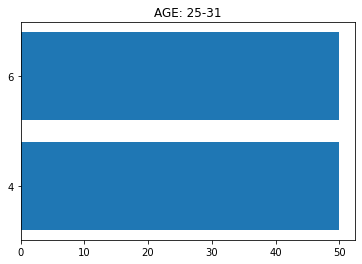

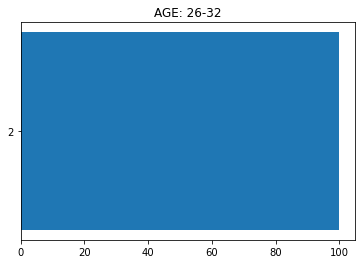

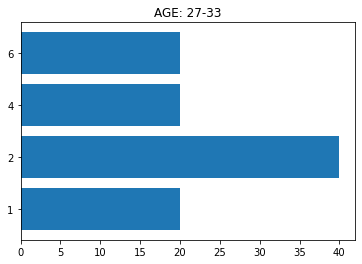

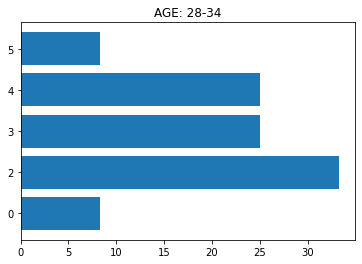

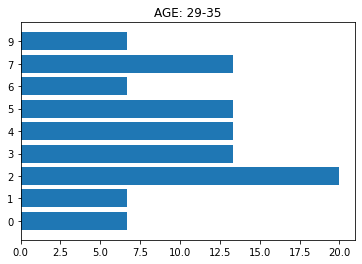

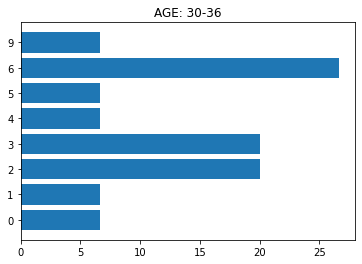

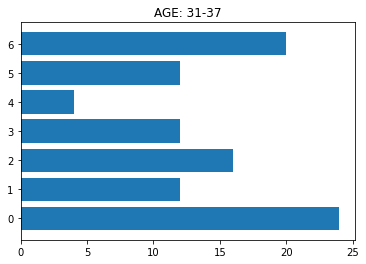

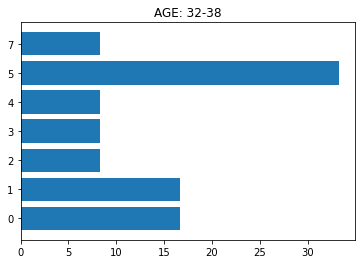

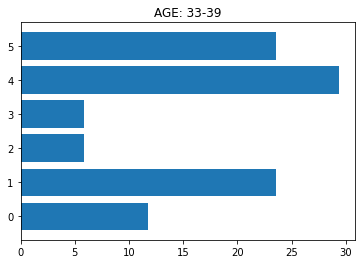

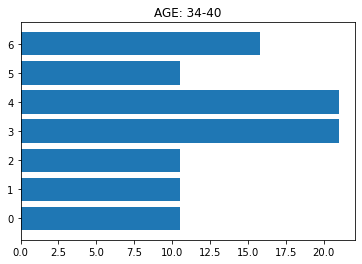

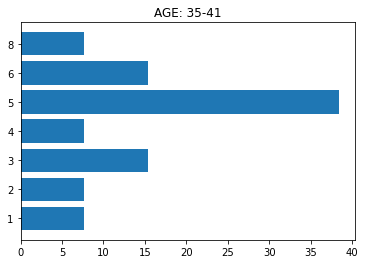

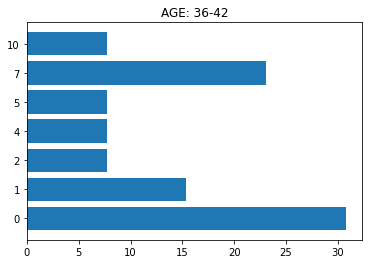

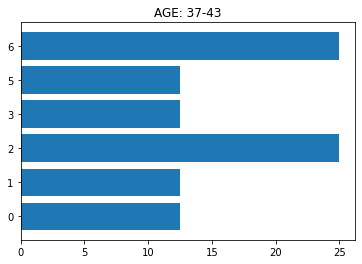

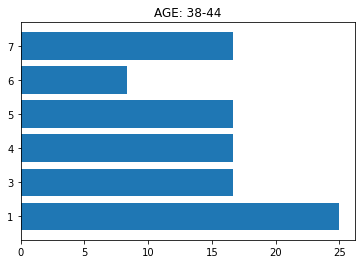

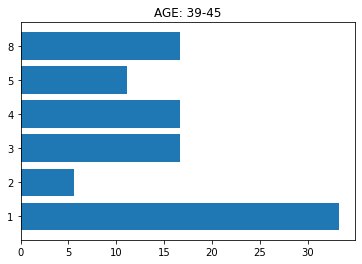

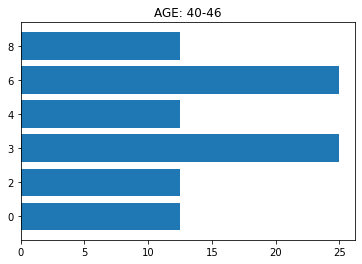

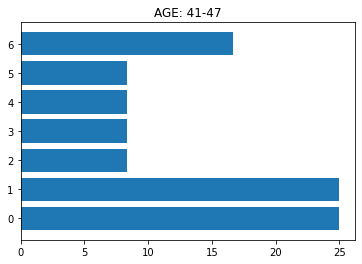

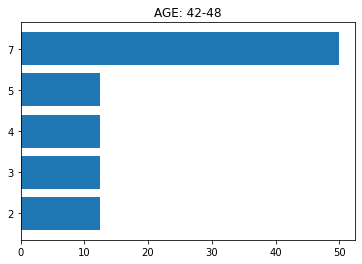

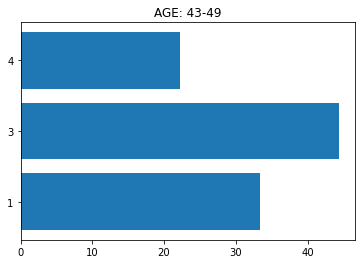

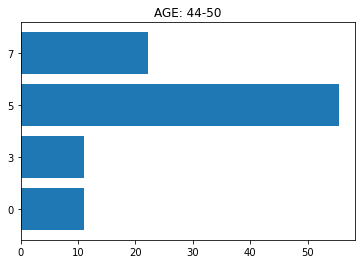

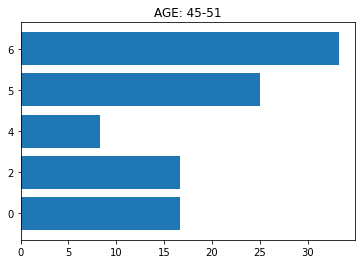

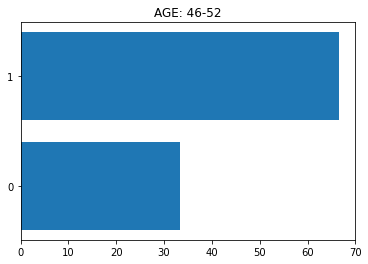

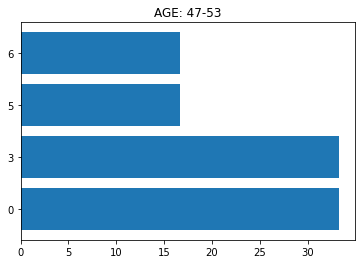

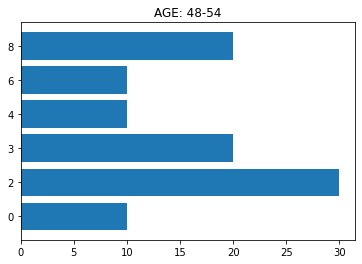

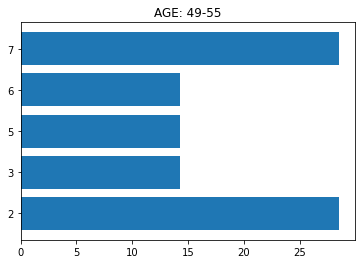

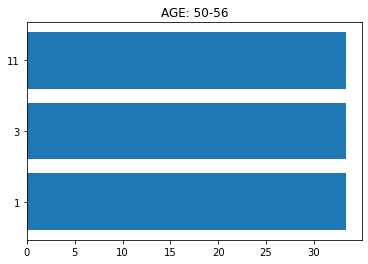

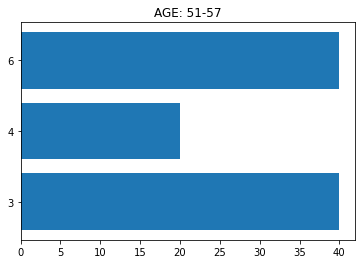

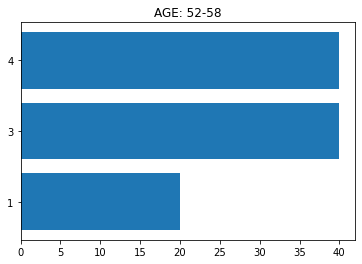

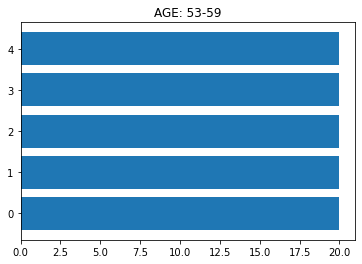

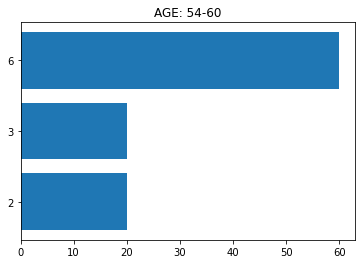

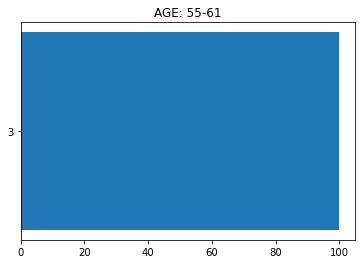

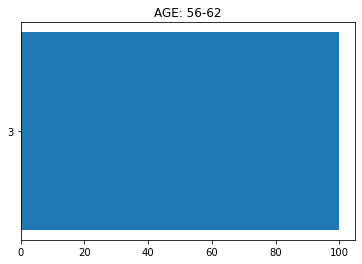

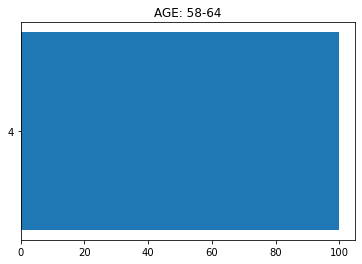

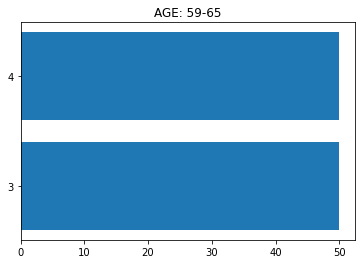

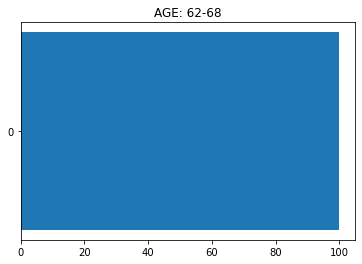

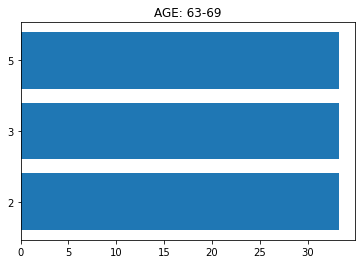

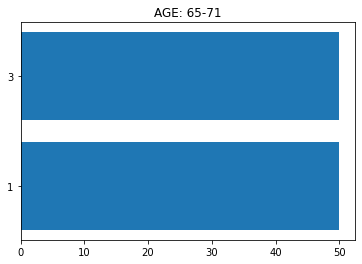

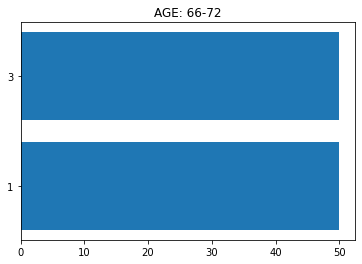

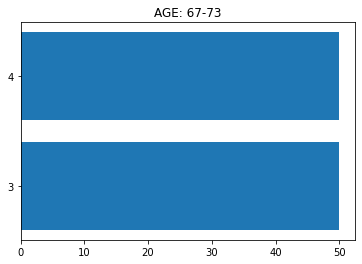

In [80]:
for i in ages:
    fig, sub = plt.subplots()
    df = age_year[age_year.age == i]
    sub.barh(list(map(str, sorted(df.years_employed))), df['percent'])
    sub.set_title(f"AGE: {i}-{i+6}")

Можно сказать что мноегие приходят до 40-41 года. бывает и такое что приходят старше 50ти. Те кто приходят в 40 - остаются на долго.
Чтобы сделать более детальный анализ нужно выбрать конкретный диапазон.
Нужно уделять внимание на сотрудников до 40 лет.

In [81]:
#Зависимость от брачного статуса
sql_str = '''SELECT maritaldesc, "Days Employed"/365  as years_employed, COUNT(*)
FROM hr_dataset
GROUP BY 1,2
ORDER BY 1,2;'''
marital_year = pd.read_sql_query(sql_str, conn)

In [82]:
sql_str = '''SELECT maritaldesc, COUNT(*) as sum, AVG(age) as meanage
FROM hr_dataset
GROUP BY 1
ORDER BY 1'''
marital_count = pd.read_sql_query(sql_str, conn)

In [84]:
marital_year = pd.merge(marital_year, marital_count)
marital_year["percent"] = round((marital_year["count"]/marital_year["sum"])*100, 2)
marital_year

,maritaldesc,years_employed,count,sum,meanage,percent
0,Divorced,0,9,30,39.000000,30.00
1,Divorced,1,1,30,39.000000,3.33
2,Divorced,2,5,30,39.000000,16.67
3,Divorced,3,5,30,39.000000,16.67
4,Divorced,4,5,30,39.000000,16.67
5,Divorced,6,4,30,39.000000,13.33
6,Divorced,7,1,30,39.000000,3.33
7,Married,0,16,123,38.691057,13.01
8,Married,1,20,123,38.691057,16.26
9,Married,2,20,123,38.691057,16.26


In [85]:
sql_str = '''SELECT maritaldesc, age as meanage
FROM hr_dataset
ORDER BY 1'''
marital_age = pd.read_sql_query(sql_str, conn)

In [88]:
marital_age.groupby("maritaldesc").median() # медианный возраст сотрудников по отделам

,meanage
maritaldesc,
Divorced,35.5
Married,38.0
Separated,43.0
Single,36.0
Widowed,40.5


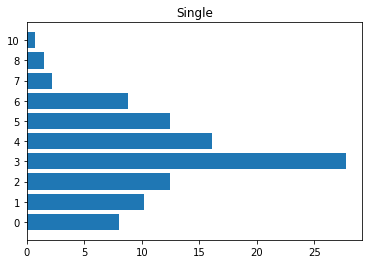

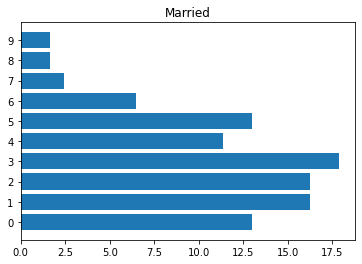

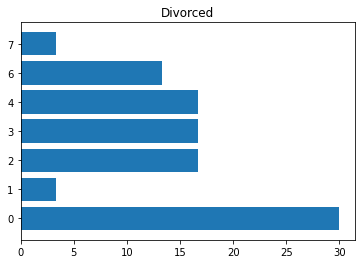

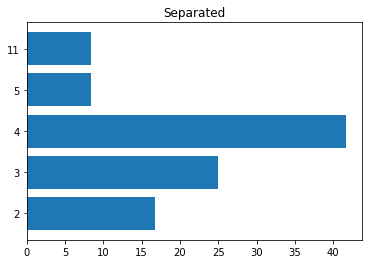

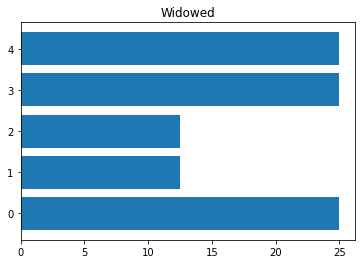

In [89]:
for i in marital.maritaldesc:
    fig, sub = plt.subplots()
    df = marital_year[marital_year.maritaldesc == i]
    sub.barh(list(map(str, sorted(df.years_employed))), df['percent'])
    sub.set_title(f"{i}")

Большая часть сотрудников хотя бы 1 раз были женаты, на продолжительность работы не влияет. Можно предположить, что потеря брачного статуса влиет на смену карьеры.
На более долгую карьеру обеспечены одинокие и женатые.

Необходимо обращать внимание на одиноких и молодых до 30 лет и стараться брать на работу именно их.

## ЗАДАНИЕ 2


Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [90]:
import requests

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response
vk_token = 'ceea06d22eb71ecaab04aae79b34527d1b15811270d2cc0d06e0fd50e3860e75497ddb0f92ce7ecfbd9b8'


In [92]:
from datetime import datetime, timedelta
k = -1
posts = list()
while True:
    k += 1
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + f'&owner_id=-66669811&offset={k}&count=1&v=5.92'
    response = getjson(url)
    try:
        it = response['response']["items"][0]
    except KeyError:
        k -= 1
        continue
    date = it['date']
    date = (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
    it['date'] = date
    if date >= '2021-06-23':
        print(f"Progress {date}")
        continue
    elif date < '2021-01-01':
        break
    else:
        posts.append(it)
    print(f"Progress {date}")

Progress 2021-06-23 11:30:20
Progress 2021-06-22 18:19:33
Progress 2021-06-22 13:30:46
Progress 2021-06-21 18:43:52
Progress 2021-06-21 12:28:52
Progress 2021-06-21 11:23:33
Progress 2021-06-20 14:15:13
Progress 2021-06-19 12:35:34
Progress 2021-06-18 18:31:24
Progress 2021-06-18 15:12:55
Progress 2021-06-17 17:50:31
Progress 2021-06-17 16:00:26
Progress 2021-06-17 14:00:17
Progress 2021-06-16 19:54:37
Progress 2021-06-16 15:50:06
Progress 2021-06-16 14:43:40
Progress 2021-06-15 18:37:33
Progress 2021-06-15 17:35:12
Progress 2021-06-14 15:12:41
Progress 2021-06-14 12:20:49
Progress 2021-06-13 10:15:24
Progress 2021-06-12 15:32:31
Progress 2021-06-11 18:52:08
Progress 2021-06-11 16:45:49
Progress 2021-06-10 18:11:23
Progress 2021-06-10 14:32:22
Progress 2021-06-09 17:29:29
Progress 2021-06-09 15:25:51
Progress 2021-06-09 13:12:08
Progress 2021-06-08 19:24:46
Progress 2021-06-07 20:27:54
Progress 2021-06-07 18:41:53
Progress 2021-06-07 15:42:25
Progress 2021-06-07 13:08:19
Progress 2021-

Progress 2021-01-30 13:49:24
Progress 2021-01-29 19:00:27
Progress 2021-01-29 17:20:24
Progress 2021-01-29 14:58:08
Progress 2021-01-27 19:09:25
Progress 2021-01-27 16:23:13
Progress 2021-01-26 18:00:21
Progress 2021-01-26 11:23:48
Progress 2021-01-25 21:35:08
Progress 2021-01-25 12:13:38
Progress 2021-01-23 15:04:34
Progress 2021-01-22 18:54:14
Progress 2021-01-22 16:10:21
Progress 2021-01-21 18:00:54
Progress 2021-01-21 12:17:58
Progress 2021-01-20 18:33:06
Progress 2021-01-20 15:50:18
Progress 2021-01-19 18:54:54
Progress 2021-01-19 16:16:35
Progress 2021-01-18 18:25:50
Progress 2021-01-18 16:12:38
Progress 2021-01-18 13:04:32
Progress 2021-01-17 13:40:33
Progress 2021-01-16 13:51:10
Progress 2021-01-15 19:24:19
Progress 2021-01-15 19:00:26
Progress 2021-01-15 17:08:47
Progress 2021-01-15 15:36:57
Progress 2021-01-13 19:43:52
Progress 2021-01-13 17:11:47
Progress 2021-01-12 20:00:20
Progress 2021-01-12 18:04:23
Progress 2021-01-12 13:50:05
Progress 2021-01-11 19:25:55
Progress 2021-

In [95]:
d_posts = {i:posts[i] for i in range(len(posts))}


In [97]:
import json
with open("posts.json", "w") as f:
    json.dump(d_posts, f)

In [107]:
posts = None
with open("posts.json",'r') as f:
    posts = json.load(f)

In [108]:
posts = list(posts.values())


In [110]:
posts[0]

{'id': 184068,
 'from_id': -66669811,
 'owner_id': -66669811,
 'date': '2021-06-22 18:19:33',
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'В помощь геймдизайнеру:\n\n— Как придумать идею\n— Чем урбанистика поможет геймдизайнеру\n— Как сделать командную работу эффективной\n— Как создание игры помогает справиться с личной трагедией\n— В чём преимущества видеоигр перед реальной жизнью\n\nЧитайте нашу подборку, смотрите классные выступления!\n\n#skillbox_игры #статья_skillbox',
 'attachments': [{'type': 'link',
   'link': {'url': 'https://m.vk.com/@skillbox-5-vystuplenii-c-ted-poleznyh-dlya-geimdizainerov',
    'title': '5 выступлений c TED, полезных для геймдизайнеров',
    'caption': 'm.vk.com',
    'description': 'Статья',
    'photo': {'album_id': -66,
     'date': 1624374957,
     'id': 457524151,
     'owner_id': -66669811,
     'has_tags': False,
     'sizes': [{'height': 26,
       'url': 'https://sun1-19.userapi.com/impg/sQou_niF_eNxOLoNyL2G0bbVnrB0Zh_2miUFyw/uqjwr31Fobo.j

In [112]:
posts[0].keys()

dict_keys(['id', 'from_id', 'owner_id', 'date', 'marked_as_ads', 'post_type', 'text', 'attachments', 'post_source', 'comments', 'likes', 'reposts', 'views', 'is_favorite'])

In [113]:
# Выделяем признаки
# Дата публикации
# Текст публикации
# Комментарии
# Лайки
# Репосты
# Просмотры
# тип поста

In [114]:
att_types = {}
for p in posts:
    for a in p['attachments']:
        if not a['type'] in att_types:
            att_types[a['type']] = a

In [115]:
att_types.keys()


dict_keys(['link', 'photo', 'video', 'poll', 'album', 'doc'])

In [116]:
for key, val in att_types.items():
    print('\n', key, '\n')
    for k, v in val[key].items():
        print(f'{k}:{v}')


 link 

url:https://m.vk.com/@skillbox-5-vystuplenii-c-ted-poleznyh-dlya-geimdizainerov
title:5 выступлений c TED, полезных для геймдизайнеров
caption:m.vk.com
description:Статья
photo:{'album_id': -66, 'date': 1624374957, 'id': 457524151, 'owner_id': -66669811, 'has_tags': False, 'sizes': [{'height': 26, 'url': 'https://sun1-19.userapi.com/impg/sQou_niF_eNxOLoNyL2G0bbVnrB0Zh_2miUFyw/uqjwr31Fobo.jpg?size=75x26&quality=96&sign=f5707c7d112c3584969c8cb2848871b3&c_uniq_tag=k9Z3_KEqWPPT8mAKszsszrdWIuXpUxFSdtoQWJMPxzA&type=album', 'type': 's', 'width': 75}, {'height': 45, 'url': 'https://sun1-19.userapi.com/impg/sQou_niF_eNxOLoNyL2G0bbVnrB0Zh_2miUFyw/uqjwr31Fobo.jpg?size=130x44&quality=96&sign=7cb1eb353ced6beb7e9017f830dc69dc&c_uniq_tag=mVPdM8O8Y938fxQ4ZjfEAplKQx0VL4IqQcHnVVMmJdw&type=album', 'type': 'm', 'width': 130}, {'height': 207, 'url': 'https://sun1-19.userapi.com/impg/sQou_niF_eNxOLoNyL2G0bbVnrB0Zh_2miUFyw/uqjwr31Fobo.jpg?size=604x206&quality=96&sign=5384731dba53e7733a88fc8e23085130

In [117]:
import re # для хештегов
temp = re.compile(r"#[\wА-Яа-яЁё_]+")


In [118]:
df = dict.fromkeys(['id', 'date', 'time', 'text_len',
                    'attachments_num', 'hashtag','view',
                    'comment', 'like','repost',
                    'poll_votes', 'poll_answers'])
for i in df:
    df[i] = list()

In [119]:
posts[0]


{'id': 184068,
 'from_id': -66669811,
 'owner_id': -66669811,
 'date': '2021-06-22 18:19:33',
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'В помощь геймдизайнеру:\n\n— Как придумать идею\n— Чем урбанистика поможет геймдизайнеру\n— Как сделать командную работу эффективной\n— Как создание игры помогает справиться с личной трагедией\n— В чём преимущества видеоигр перед реальной жизнью\n\nЧитайте нашу подборку, смотрите классные выступления!\n\n#skillbox_игры #статья_skillbox',
 'attachments': [{'type': 'link',
   'link': {'url': 'https://m.vk.com/@skillbox-5-vystuplenii-c-ted-poleznyh-dlya-geimdizainerov',
    'title': '5 выступлений c TED, полезных для геймдизайнеров',
    'caption': 'm.vk.com',
    'description': 'Статья',
    'photo': {'album_id': -66,
     'date': 1624374957,
     'id': 457524151,
     'owner_id': -66669811,
     'has_tags': False,
     'sizes': [{'height': 26,
       'url': 'https://sun1-19.userapi.com/impg/sQou_niF_eNxOLoNyL2G0bbVnrB0Zh_2miUFyw/uqjwr31Fobo.j

In [120]:
for i, el in enumerate(posts):
    id_ = i
    date, time = el["date"].split()
    text = el["text"]
    text_len = len(text)
    hashtags = temp.findall(text)
    view = el["views"]["count"]
    comment = el["comments"]["count"]
    like = el["likes"]["count"]
    repost = el["reposts"]["count"]
    attachments = el["attachments"]
    attachments_num = len(attachments)
    poll_votes = 0
    poll_answers = 0
    for a in attachments:
        if a["type"] == "poll":
            answers = a["poll"]["answers"]
            poll_answers = len(answers)
            for an in answers:
                poll_votes += an["votes"]
    for h in hashtags:
        df["id"].append(id_)
        df["date"].append(date)
        df["time"].append(time)
        df["text_len"].append(text_len)
        df["hashtag"].append(h[1:])
        df["view"].append(view)
        df["comment"].append(comment)
        df["like"].append(like)
        df["repost"].append(repost)
        df["attachments_num"].append(attachments_num)
        df["poll_votes"].append(poll_votes)
        df["poll_answers"].append(poll_answers)

In [121]:
df

{'id': [0,
  0,
  1,
  2,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  11,
  12,
  12,
  13,
  14,
  15,
  16,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  35,
  36,
  36,
  37,
  38,
  38,
  39,
  40,
  40,
  41,
  42,
  42,
  43,
  45,
  46,
  47,
  48,
  48,
  49,
  49,
  50,
  51,
  52,
  52,
  53,
  54,
  54,
  55,
  56,
  57,
  57,
  58,
  60,
  60,
  62,
  63,
  64,
  65,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  79,
  80,
  80,
  81,
  82,
  83,
  84,
  84,
  85,
  85,
  86,
  87,
  88,
  89,
  89,
  90,
  90,
  91,
  92,
  93,
  94,
  94,
  95,
  96,
  96,
  97,
  98,
  99,
  100,
  100,
  101,
  101,
  103,
  104,
  104,
  105,
  106,
  106,
  107,
  108,
  109,
  110,
  110,
  111,
  112,
  113,
  114,
  114,
  115,
  115,
  116,
  117,
  118,
  118,
  119,
  120,
  121,
  122,
  122,
  123,
  124,
  125,
  129,
  129,
  130,
  1

In [122]:
df = pd.DataFrame(df)
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0,26,32,0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0,26,32,0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,4,20,5,0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,4,36,39,0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,4,36,39,0,0


In [123]:
df.hashtag = df.hashtag.apply(lambda x: x.lower())
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0,26,32,0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0,26,32,0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,4,20,5,0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,4,36,39,0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,4,36,39,0,0


In [124]:
conv = lambda x, y: round((x/y) * 1000, 2)
df.comment = conv(df.comment, df.view)
df.like = conv(df.like, df.view)
df.repost = conv(df.repost, df.view)
df.poll_votes = conv(df.poll_votes, df.view)

In [125]:
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0.00,2.97,3.66,0.0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0.00,2.97,3.66,0.0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,0.43,2.15,0.54,0.0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,0.28,2.51,2.72,0.0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,0.28,2.51,2.72,0.0,0


In [126]:
def scale(series, mean = None):
    if mean is None:
        mean = series.mean()
    k = 100 / mean
    return series * k
for i in list(df.columns)[7:10]:
    df[i] = scale(df[i])
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0.000000,99.526306,194.578937,0.0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0.000000,99.526306,194.578937,0.0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,151.733457,72.047663,28.708368,0.0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,98.803181,84.111457,144.605112,0.0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,98.803181,84.111457,144.605112,0.0,0


In [127]:
df["poll_votes"] = scale(df["poll_votes"], mean = df[df["poll_votes"] > 0].poll_votes.mean())
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0.000000,99.526306,194.578937,0.0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0.000000,99.526306,194.578937,0.0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,151.733457,72.047663,28.708368,0.0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,98.803181,84.111457,144.605112,0.0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,98.803181,84.111457,144.605112,0.0,0


In [128]:
l = list(df.columns.copy())
l.remove("hashtag")
df_no_hash = df.loc[:, l].sort_values("date").drop_duplicates().reset_index()

In [129]:
del df_no_hash['index']
del df_no_hash['id']
df_no_hash.head()

,date,time,text_len,attachments_num,view,comment,like,repost,poll_votes,poll_answers
0,2021-01-02,13:49:22,253,6,48269,190.548992,93.829514,95.694559,0.0,0
1,2021-01-04,17:00:23,353,1,36118,779.839395,96.510357,92.504741,0.0,0
2,2021-01-06,19:46:29,614,1,34131,21.172110,42.223281,31.366550,0.0,0
3,2021-01-08,19:44:11,548,1,30491,116.446606,54.957287,38.277824,0.0,0
4,2021-01-08,17:00:18,146,1,28203,0.000000,85.451879,90.378195,0.0,0


In [130]:
# смотрим матрицу корреляций

In [132]:
import seaborn as sns
corr_m = df.loc[:, 'text_len':].corr()
corr_m

,text_len,attachments_num,view,comment,like,repost,poll_votes,poll_answers
text_len,1.000000,0.061010,-0.019109,-0.015541,-0.121705,-0.179789,0.091202,0.098069
attachments_num,0.061010,1.000000,0.265321,0.046286,0.497343,0.323207,-0.055385,-0.060204
view,-0.019109,0.265321,1.000000,0.169830,0.383909,0.273999,0.159421,0.085621
comment,-0.015541,0.046286,0.169830,1.000000,0.108580,0.053736,0.233973,0.198121
like,-0.121705,0.497343,0.383909,0.108580,1.000000,0.732059,-0.018901,-0.050497
repost,-0.179789,0.323207,0.273999,0.053736,0.732059,1.000000,-0.061741,-0.079145
poll_votes,0.091202,-0.055385,0.159421,0.233973,-0.018901,-0.061741,1.000000,0.844992
poll_answers,0.098069,-0.060204,0.085621,0.198121,-0.050497,-0.079145,0.844992,1.000000


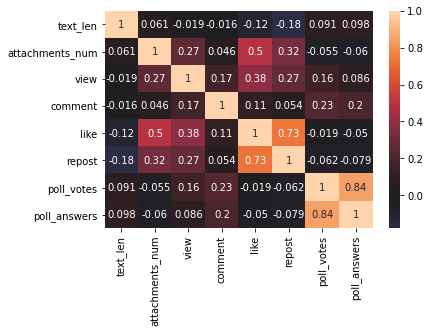

In [134]:
sns.heatmap(corr_m, center=0, annot=True)

* длина текста имеет слабо выраженную корреляцию
* доля просмотров хорошо выражена между лайками и репостами
* сильная положительная корелляция по долям лайков и репостов
* доля голосов пока не ясна.

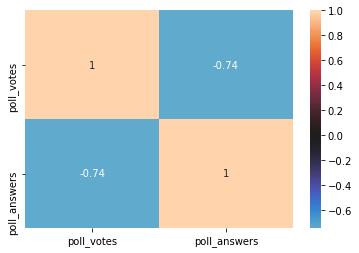

In [135]:
corr_m = df[df.poll_answers > 0].loc[:, 'poll_votes':].corr()
sns.heatmap(corr_m, center=0, annot=True)

In [137]:
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2021-06-22,18:19:33,327,1,skillbox_игры,8750,0.000000,99.526306,194.578937,0.0,0
1,0,2021-06-22,18:19:33,327,1,статья_skillbox,8750,0.000000,99.526306,194.578937,0.0,0
2,1,2021-06-22,13:30:46,658,5,skillbox_курсы,9283,151.733457,72.047663,28.708368,0.0,0
3,2,2021-06-21,18:43:52,110,1,skillbox_маркетинг,14344,98.803181,84.111457,144.605112,0.0,0
4,2,2021-06-21,18:43:52,110,1,статья_skillbox,14344,98.803181,84.111457,144.605112,0.0,0


In [138]:
# чем больше вариантов ответов, тем меньше проголосовавщих

In [139]:
count = df.groupby("hashtag").count().loc[:, "id":"id"]
count

,id
hashtag,
bkmenucourt,1
ruarts_skillbox,1
ruartsfoundation,1
skillbox,10
skillbox_clubhouse,1
...,...
статья_skillbox,74
студенты_skillbox,4
чему_научились_нейросети,1


In [144]:
count[count["id"] > 4]
# отсортируем

,id
hashtag,
skillbox,10
skillbox_анонс,20
skillbox_вдохновляет,10
skillbox_дизайн,69
skillbox_игры,5
skillbox_маркетинг,51
skillbox_программирование,23
skillbox_управление,17
в_закладки_skillbox,43


In [145]:
# 13 рубрик
rubrics = list(count[count["id"] > 4].index)
rubrics


['skillbox',
 'skillbox_анонс',
 'skillbox_вдохновляет',
 'skillbox_дизайн',
 'skillbox_игры',
 'skillbox_маркетинг',
 'skillbox_программирование',
 'skillbox_управление',
 'в_закладки_skillbox',
 'высшее_образование_skillbox',
 'лекторий_skillbox',
 'расписание_skillbox',
 'статья_skillbox']

In [152]:
import numpy as np
def av_med(df):
    cols = ["comment", "like", "repost"]
    meds = []
    if df.shape[0] != df[df["poll_votes"] == 0].shape[0]:
        meds.append(df[df["poll_votes"] != 0]["poll_votes"].median())
    for i in cols:
        meds.append(df[i].mean())
    return np.mean(meds)

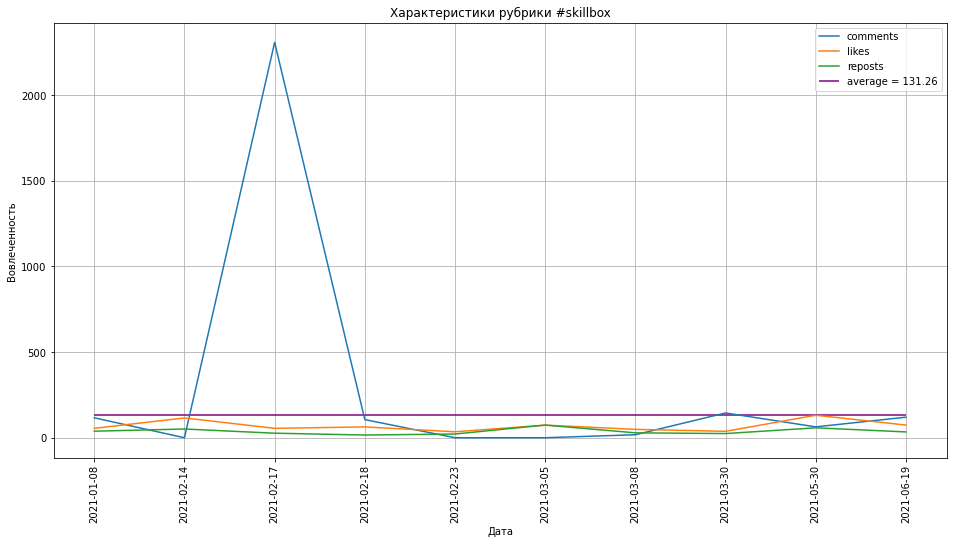

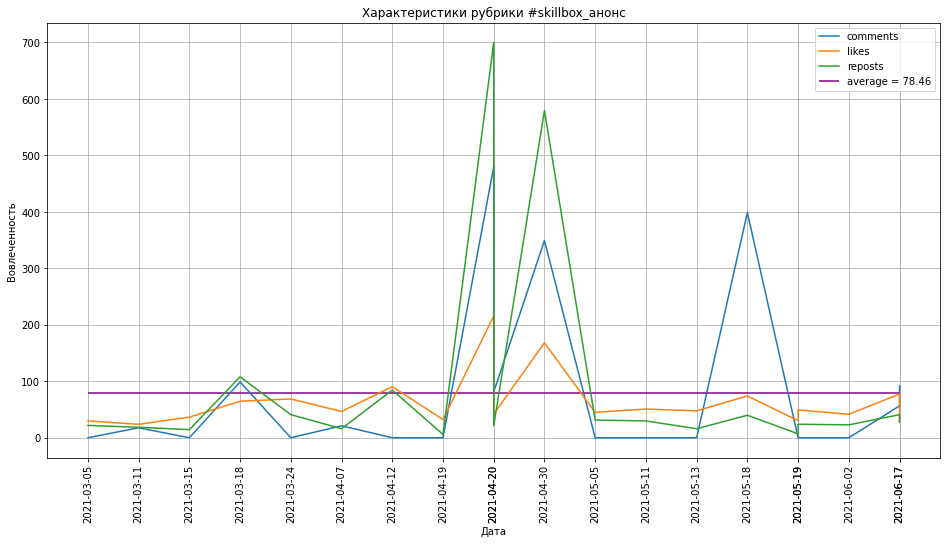

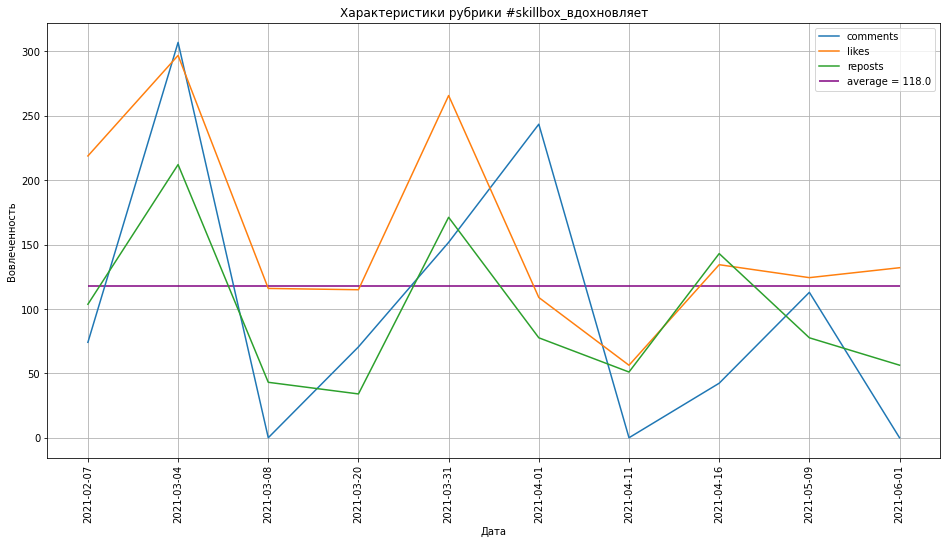

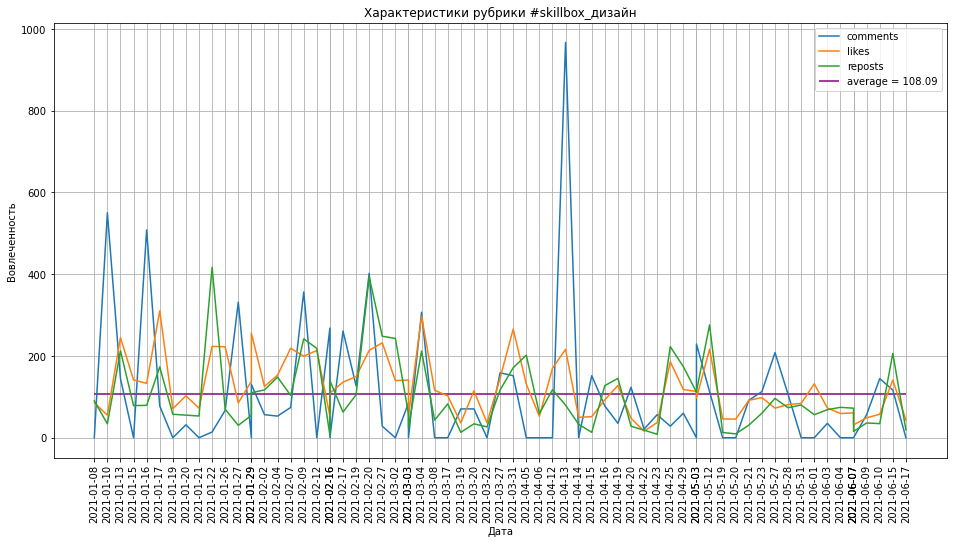

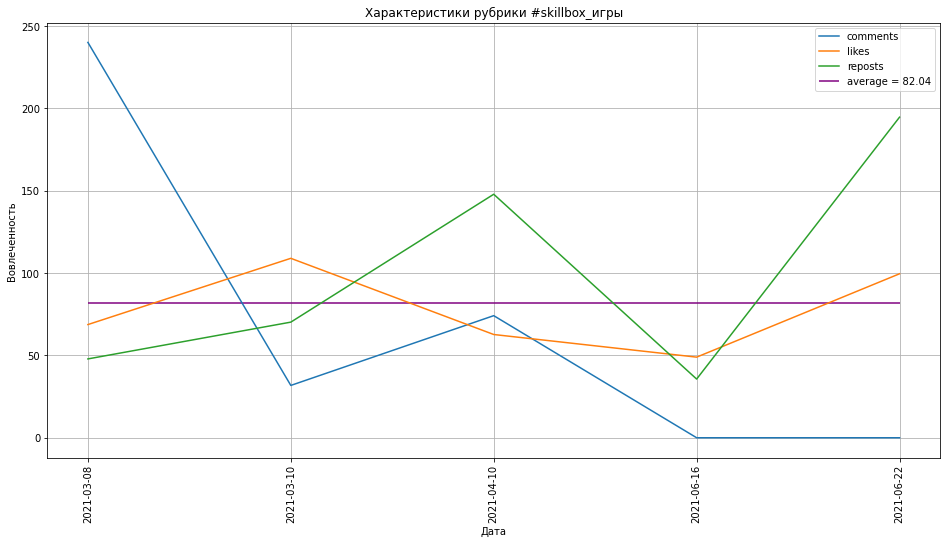

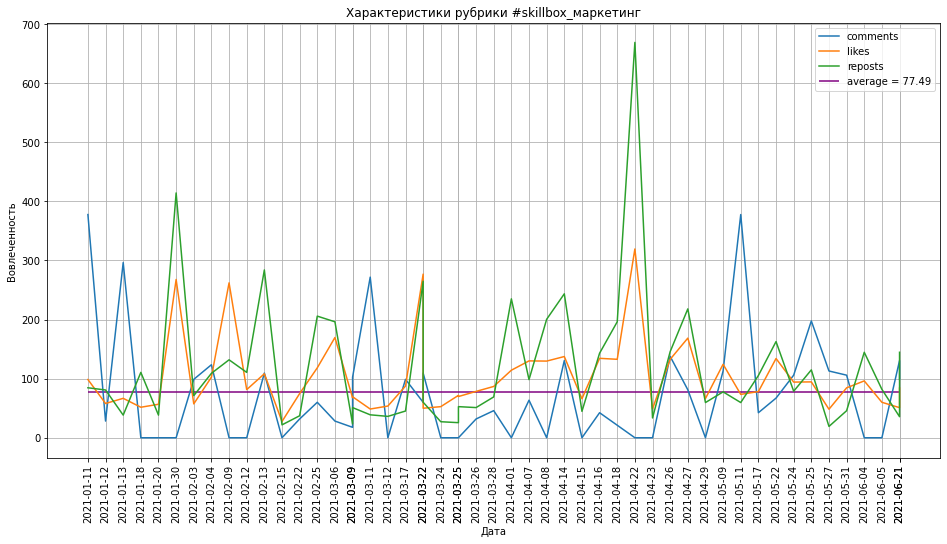

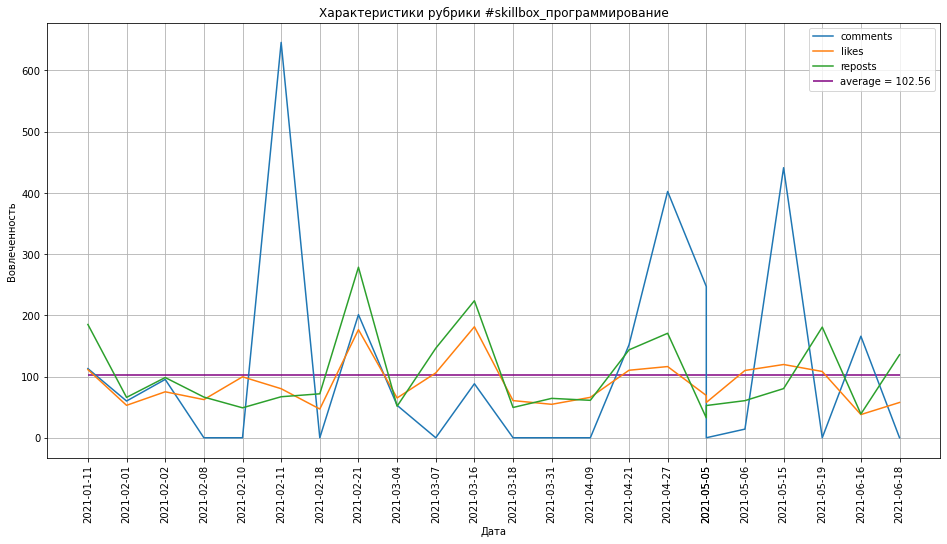

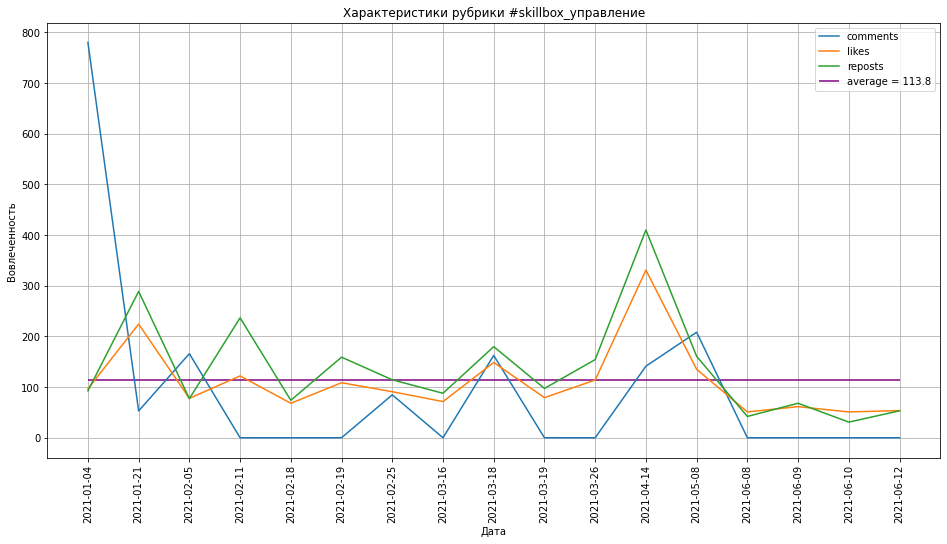

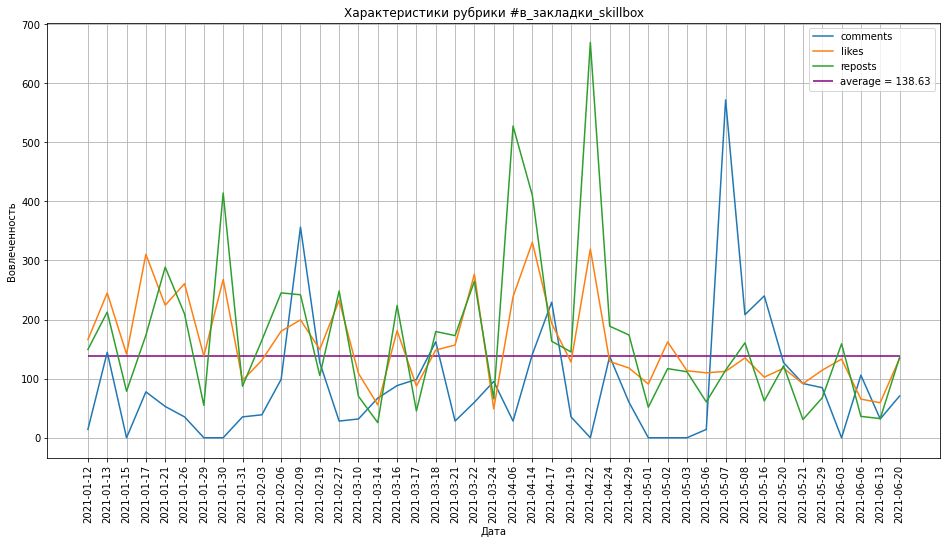

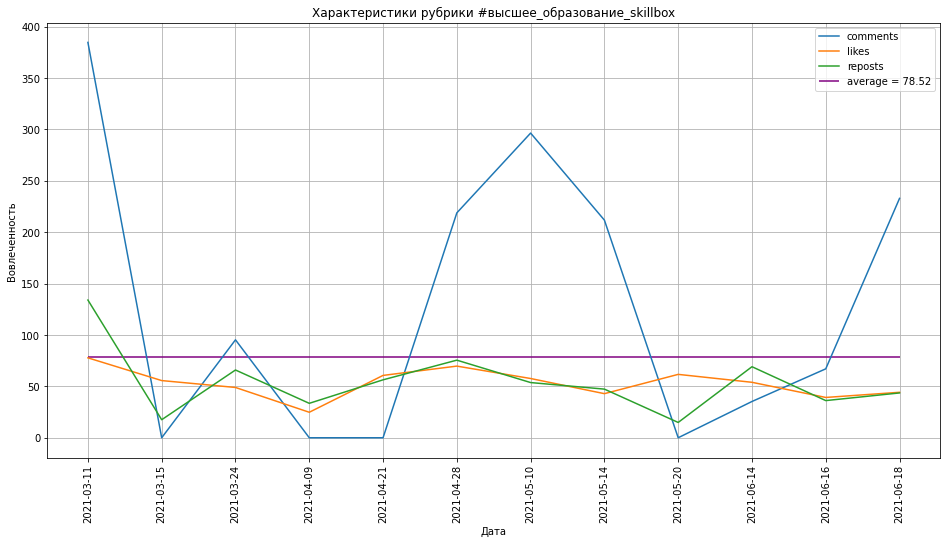

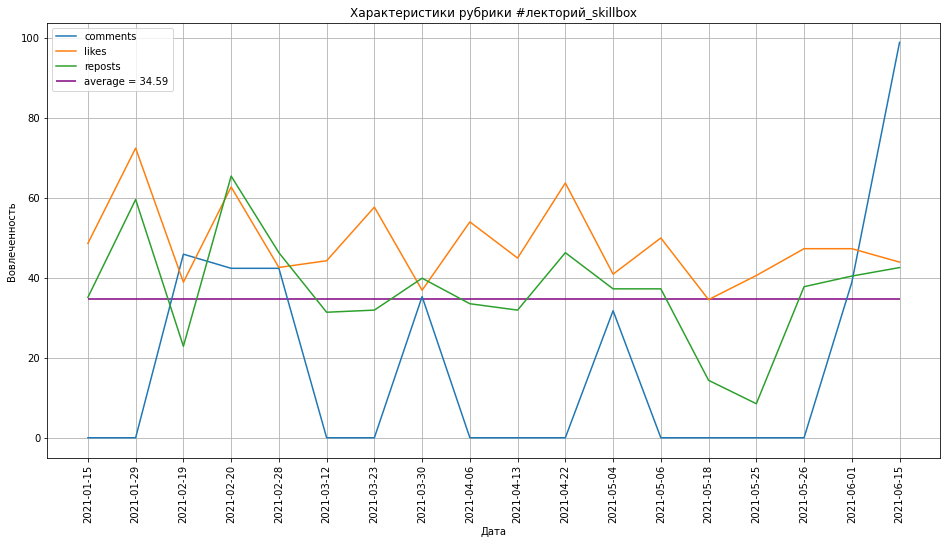

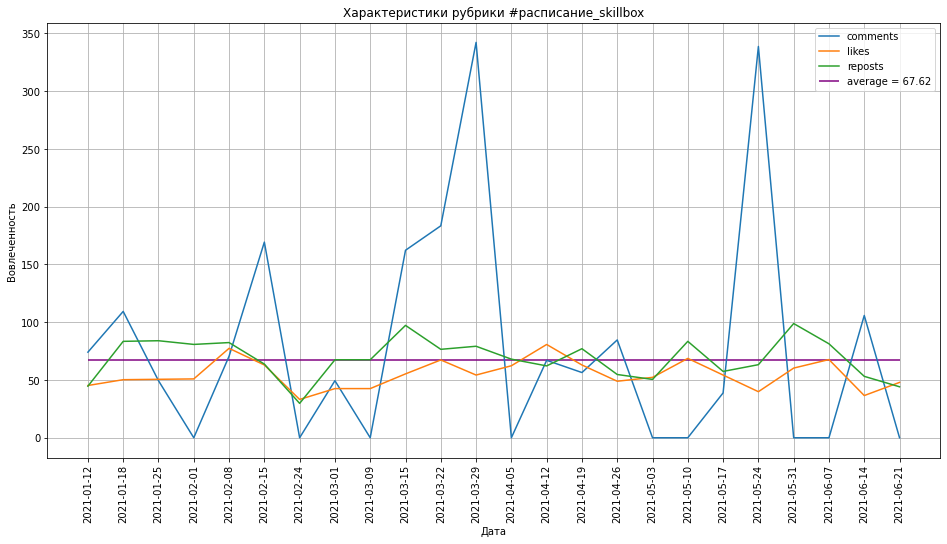

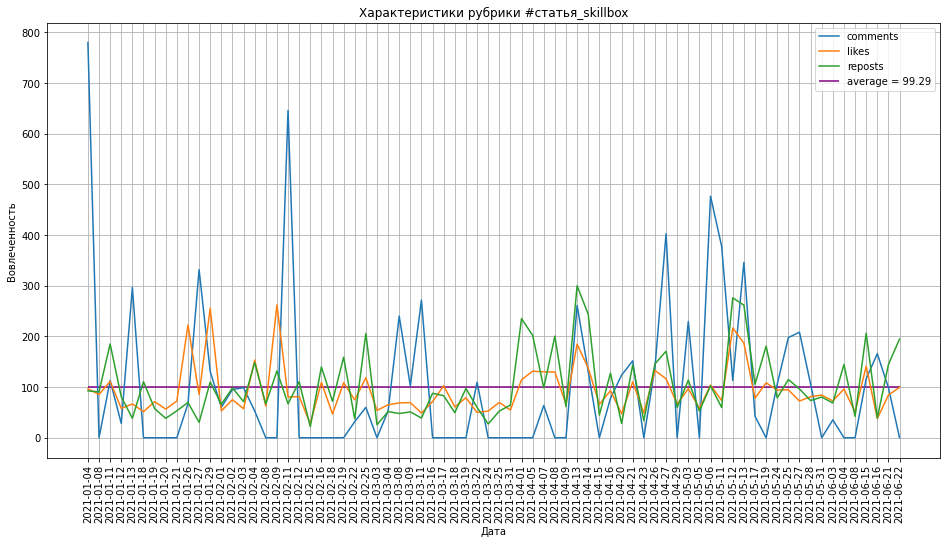

In [154]:
from matplotlib import pyplot as plt
df = df.sort_values("date")
for ind, r in enumerate(rubrics):
    current_df = df[df["hashtag"] == r]
    xticks = current_df["date"]
    am = av_med(current_df)
    fig, subplot = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.plot(xticks, current_df["comment"], label = "comments")
    plt.plot(xticks, current_df["like"], label = "likes")
    plt.plot(xticks, current_df["repost"], label = "reposts")
    plt.hlines(am, list(xticks)[0], list(xticks)[-1], color = "purple", label = f"average = {round(am, 2)}")
    plt.xticks(xticks, rotation = "vertical")
    plt.xlabel("Дата")
    plt.ylabel("Вовлеченность")
    plt.legend()
    plt.grid()
    plt.title(f"Характеристики рубрики #{r}")
    plt.show()